In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.patches import Rectangle
sns.set(context='poster', style='white')
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'arial'

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/advanced-social-project/songs-final-data.csv')
df.head()

,name,artist,album_name,release_date,lyrics
0,Kya Karoon?,Shankar-Ehsaan-Loy,Wake Up Sid (Original Motion Picture Soundtrack),2009-08-21,आ आ आ आ मैं लड़की ऐसे जो सजाके बाहर जाए पीछे पद...
1,Iktara,Amit Trivedi,Wake Up Sid (Original Motion Picture Soundtrack),2009-08-21,ो रे मनवा तू तो बावरा है तू ही जाने तू क्या सो...
2,Love You Zindagi,Amit Trivedi,Dear Zindagi (Original Motion Picture Soundtrack),2016-11-15,जो दिल से लगे उसे कह दो ही ही ही जो दिल न लगे ...
3,Shaitan Ka Saala,Sohail Sen,"Shaitan Ka Saala (From ""Housefull 4"")",2019-10-07,इंग्लिश बाला बाला बाला बाला बाला बाला बाला बाल...
4,Samjhawan,Jawad Ahmad,"Samjhawan (Unplugged by Alia Bhatt) [From ""Hum...",2014-06-19,इंग्लिश नहीं जीना तेरे बाजू नहीं जीना नहीं जीन...


In [ ]:
min_count = 2
n_words_display = 200

<ipython-input-5-1f3d12b015bc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='song_count', y='artist', data=top_artists, palette='viridis')


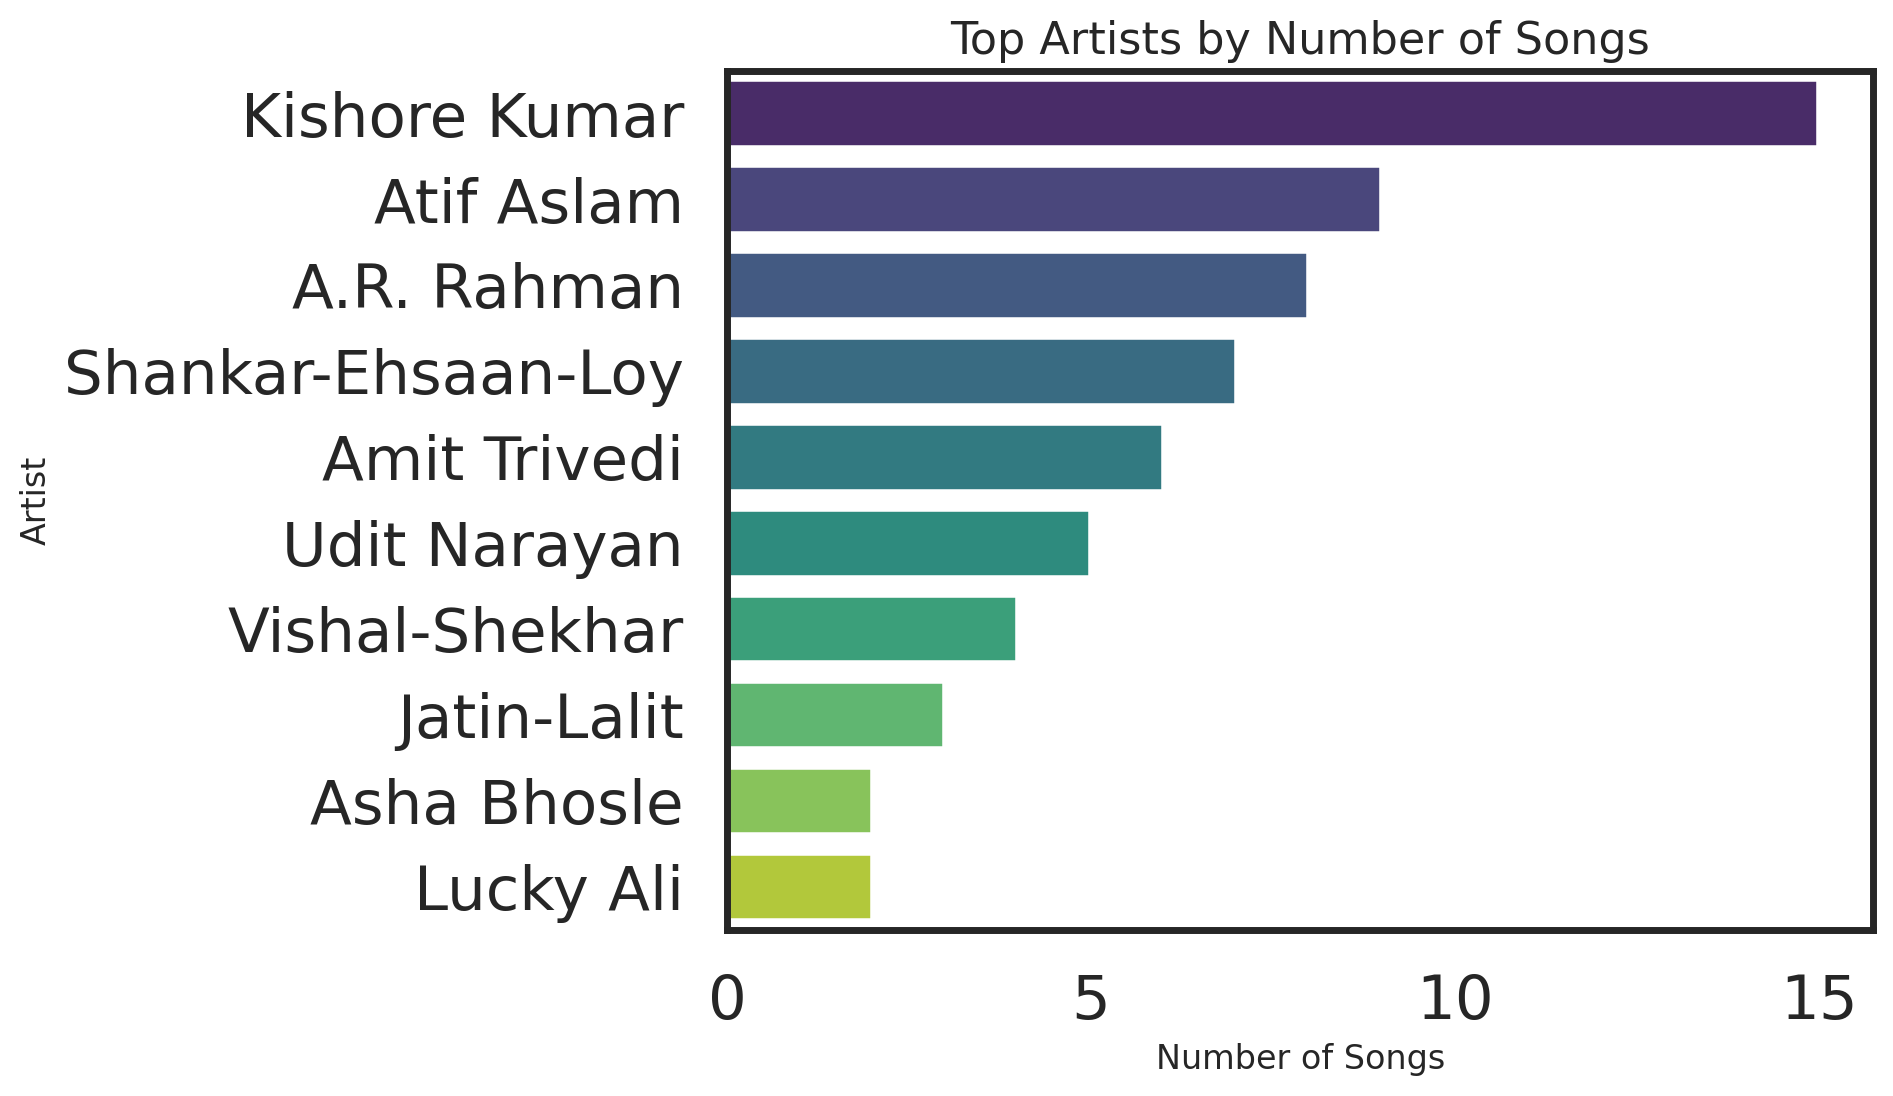

In [ ]:
artist_counts = df['artist'].value_counts().reset_index()
artist_counts.columns = ['artist', 'song_count']

top_artists = artist_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='song_count', y='artist', data=top_artists, palette='viridis')
plt.title('Top Artists by Number of Songs', fontsize=16)
plt.xlabel('Number of Songs', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.tight_layout()
plt.show()

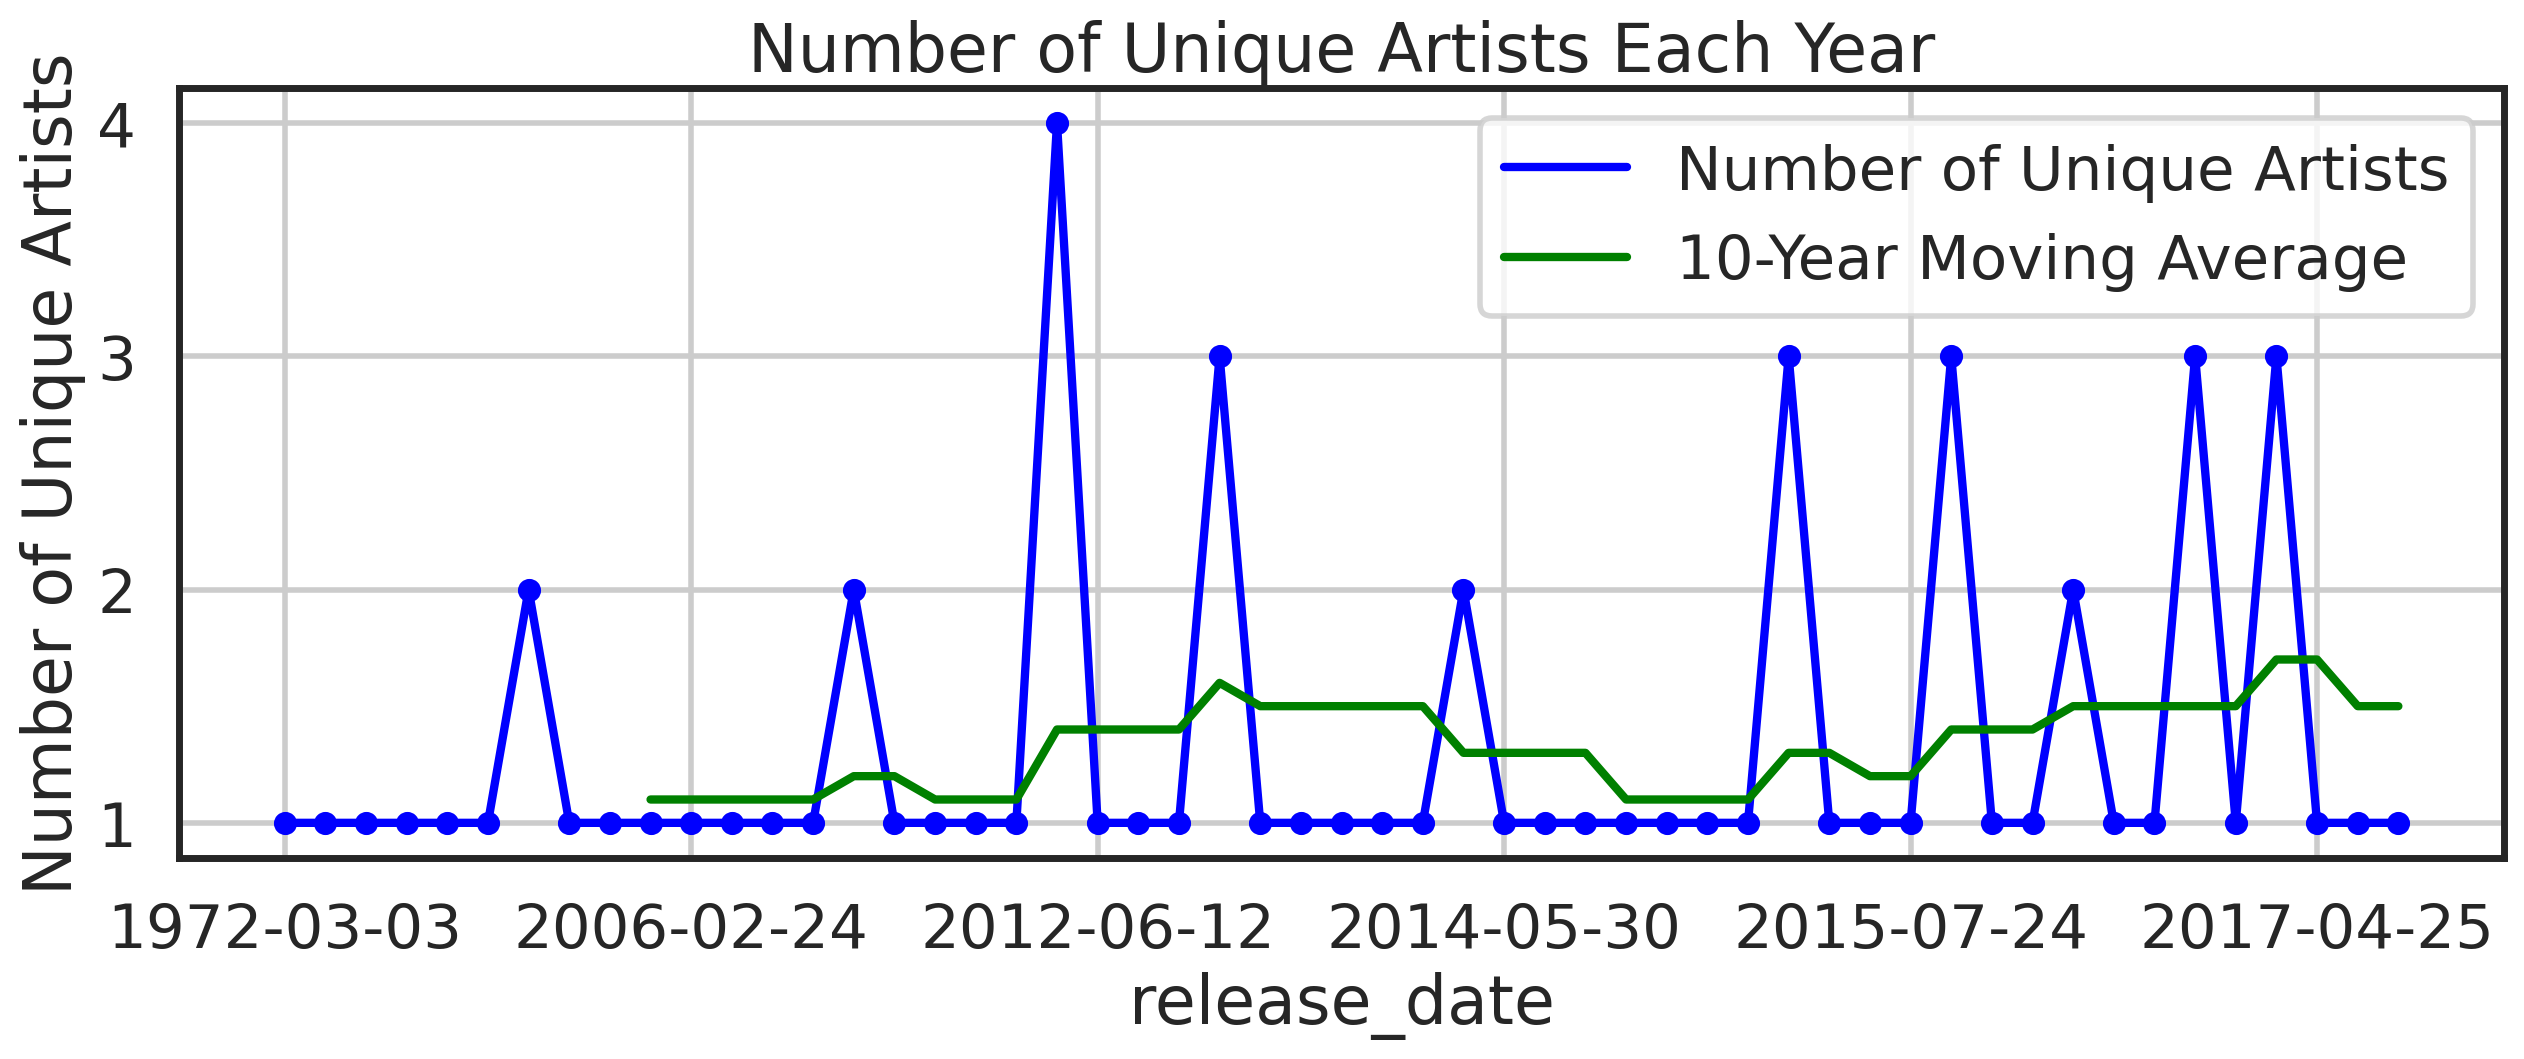

In [ ]:
nunique_artists_year = df.groupby(['release_date'])['artist'].agg(pd.Series.nunique)

plt.figure(figsize=(18, 15))
ax = nunique_artists_year.plot.line(figsize=(15, 5), grid=True, color='blue', label='Number of Unique Artists')
ax.scatter(nunique_artists_year.index, nunique_artists_year, s=40, color='blue')

ax.set(ylabel='Number of Unique Artists',
       title='Number of Unique Artists Each Year')

nunique_artists_year.rolling(window=10).mean().plot(
    ax=ax, grid=True, color='green', label='10-Year Moving Average')

ax.legend()

plt.show()


In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'],format='mixed')

<ipython-input-8-9efea86378c5>:6: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  min_max_years = df.groupby('artist')['release_date'].agg([min, max])
<ipython-input-8-9efea86378c5>:6: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  min_max_years = df.groupby('artist')['release_date'].agg([min, max])


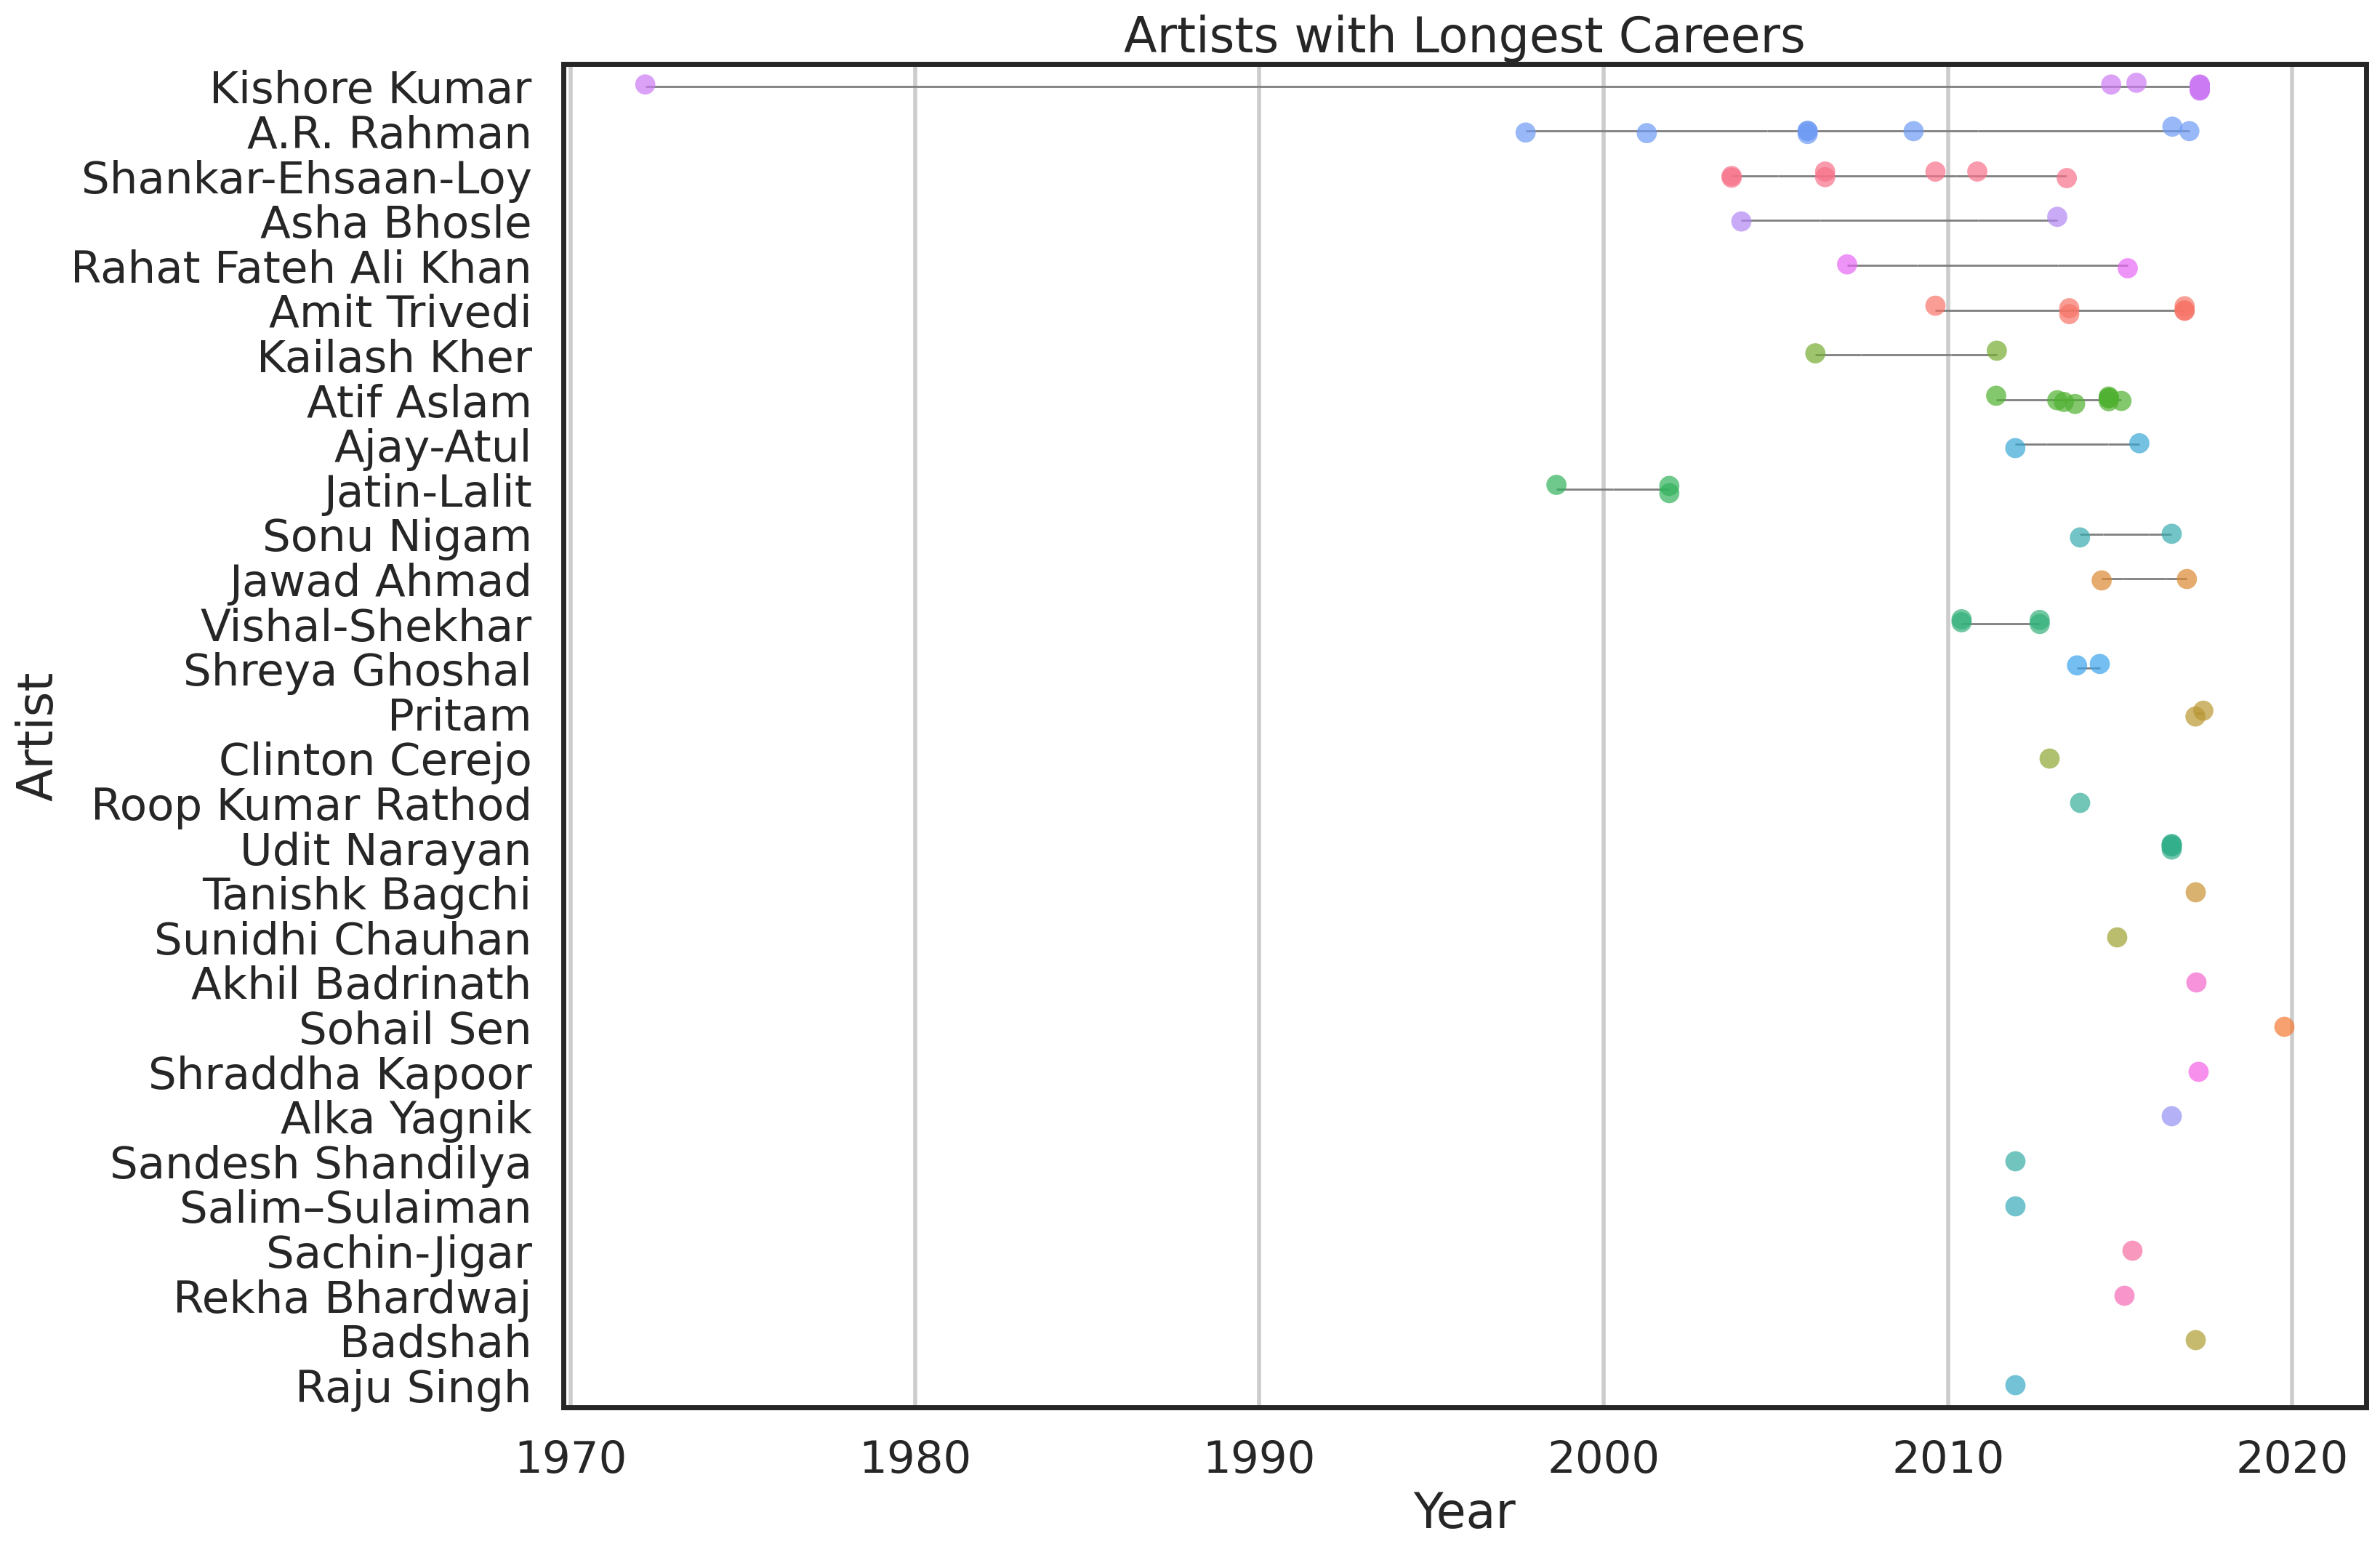

In [ ]:
longevity = df.groupby('artist').agg({'release_date': np.ptp})
longevity.columns = ['longevity']

longevity = longevity.sort_values(by='longevity', ascending=False).head(30)

min_max_years = df.groupby('artist')['release_date'].agg([min, max])

timeless = lambda x: True if x in longevity.index else False
timeless_df = df[['artist', 'release_date']][df['artist'].apply(timeless)]
plt.figure(figsize=(16, 12))

unique_artists = timeless_df['artist'].unique()
palette = sns.color_palette("husl", len(unique_artists))

sns.boxplot(data=timeless_df, x='release_date', y='artist', width=0, whis=[0, 100],
            order=longevity.index, color='lightgray')

sns.stripplot(data=timeless_df, x='release_date', y='artist', jitter=True,
              order=longevity.index, size=10, alpha=0.7,
              palette=palette, hue='artist', dodge=False, legend=False)

plt.gca().xaxis.grid(True)
plt.ylabel('Artist')
plt.xlabel('Year')
plt.title('Artists with Longest Careers', fontsize=24)
plt.show()


In [ ]:
from scipy.stats import relfreq

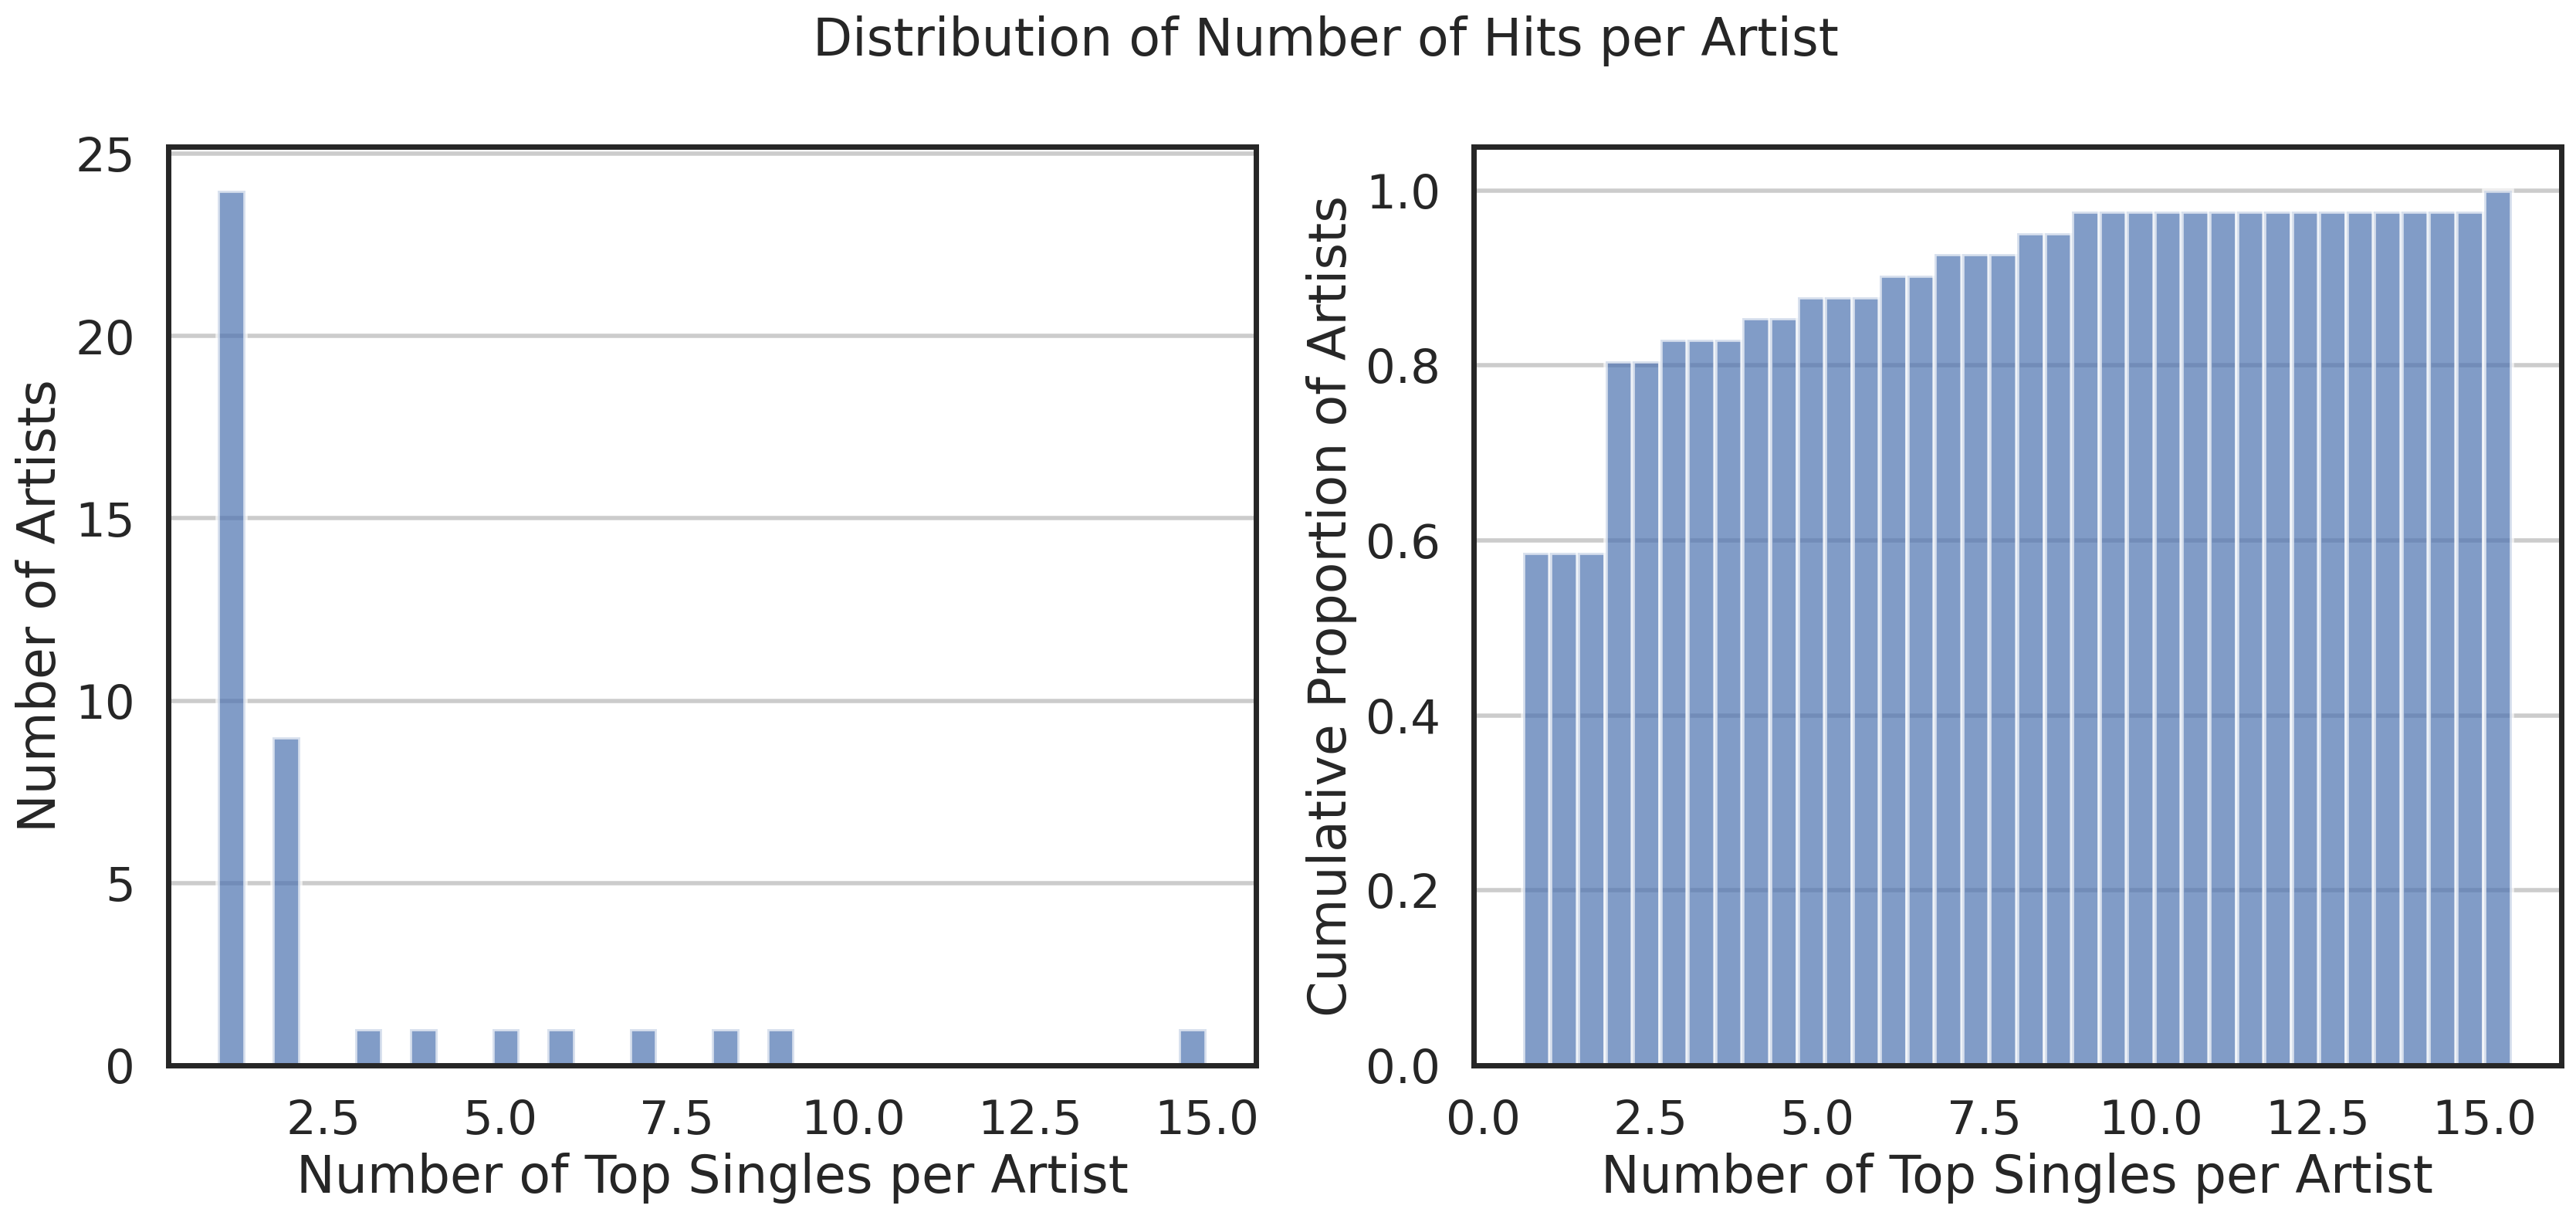

In [ ]:
axes = list()
plt.figure(figsize=(20, 17))
grid_positions = [221, 222]
for position in grid_positions:
    axes.append(plt.subplot(position))

df['artist'].value_counts().plot.hist(bins=36, ax=axes[0], alpha=0.7)
axes[0].set(ylabel='Number of Artists')

counts = df['artist'].value_counts()
res = relfreq(counts, numbins=36)
x = res.lowerlimit + np.linspace(0, res.binsize * res.frequency.size,
                                 res.frequency.size)
axes[1].bar(x, np.cumsum(res.frequency), width=res.binsize + 0.02, alpha=0.7)
axes[1].set(ylabel='Cumulative Proportion of Artists')

for ax in axes[:2]:
    ax.set(xlabel='Number of Top Singles per Artist')
    ax.yaxis.grid(True)

longevity = df.groupby('artist').agg({
    'release_date': lambda x: (x.max() - x.min()).days / 365,  # Convert days to years
    'name': len
})
longevity.columns = ['longevity', 'n_singles']
longevity['longevity'] = longevity['longevity'].astype(int) + 1  # Round to int and add 1 year
longevity['hits_per_year'] = longevity['n_singles'] / longevity['longevity']

plt.suptitle('Distribution of Number of Hits per Artist',
             fontsize=24, y=0.93)

plt.show()